<a href="https://colab.research.google.com/github/faithNassiwa/predictive-diagnosis-assistant/blob/main/models/Dataset1_EDA_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing

In [3]:
# Mount google drive to access folder with data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load datasets
training_path = '/content/drive/MyDrive/DS5500/Data/kaggle_KAUSHIL268/Training.csv'
test_path = '/content/drive/MyDrive/DS5500/Data/kaggle_KAUSHIL268/Testing.csv'

training_df = pd.read_csv(training_path, usecols = lambda col: col not in ["Unnamed: 133"])
test_df = pd.read_csv(test_path)

In [5]:
# peak at training dataset
training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
# peak at testing dataset
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
# Concatenating DataFrames vertically
combined_df = pd.concat([training_df, test_df], ignore_index=True)

In [8]:
len(training_df)

4920

In [9]:
len(test_df)

42

In [13]:
diseases = combined_df['prognosis'].unique().tolist()
print(f'Total number of diseases is: {len(diseases)}')
print(f'These include {", ".join(diseases)}')

Total number of diseases is: 41
These include Fungal infection, Allergy, GERD, Chronic cholestasis, Drug Reaction, Peptic ulcer diseae, AIDS, Diabetes , Gastroenteritis, Bronchial Asthma, Hypertension , Migraine, Cervical spondylosis, Paralysis (brain hemorrhage), Jaundice, Malaria, Chicken pox, Dengue, Typhoid, hepatitis A, Hepatitis B, Hepatitis C, Hepatitis D, Hepatitis E, Alcoholic hepatitis, Tuberculosis, Common Cold, Pneumonia, Dimorphic hemmorhoids(piles), Heart attack, Varicose veins, Hypothyroidism, Hyperthyroidism, Hypoglycemia, Osteoarthristis, Arthritis, (vertigo) Paroymsal  Positional Vertigo, Acne, Urinary tract infection, Psoriasis, Impetigo


In [11]:
combined_df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


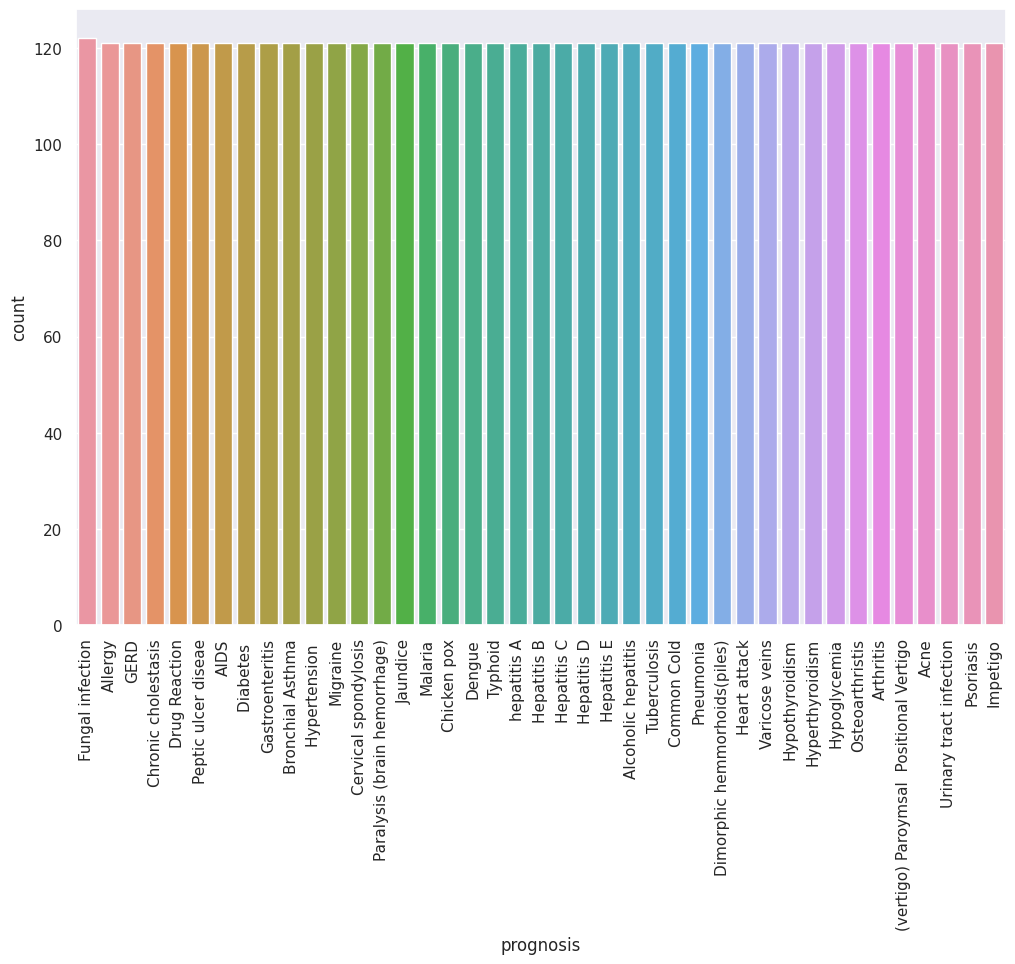

In [14]:
# Check for data balance
plt.figure(figsize=(12,8))
sns.countplot(x='prognosis', data=combined_df)

plt.xticks(rotation=90)  # This will rotate the x-axis labels for better readability if they are long
plt.show()

Dataset is balanced

In [15]:
# Correlation Table
corr_table = combined_df.corr()
corr_table.style.background_gradient(cmap='viridis')

<ipython-input-15-9a431803714f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_table = combined_df.corr()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


# Decision Tree Classifier Cross Validation

In [16]:
# Perform Cross Validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

## using RandomizedSearchCV instead of GridSearchCV due to a wide ranfe of hyperparameters
## to explore without exhuatively searching the entire grid saving on computation time

X = combined_df.iloc[:, :-1]
y = combined_df.iloc[:, -1]

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3,31),
    'min_samples_split': [2, 5, 10, 20 , 50],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.5, None]

}

# Initialize model and cross validation
clf = DecisionTreeClassifier()
random_search = RandomizedSearchCV(clf,
                                   param_distributions=params,
                                   n_iter=100, # number of parameter settings to sample
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs= -1 , # use all cores for faster computation
                                   verbose = 1, # to see progress, set to 0 for no output or 2 for detailed output
                                   random_state=42 # for reproducibility
                                   )


# fit cv
random_search.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         None],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20,
                                                              50]},
                   random_state=42, scoring='accuracy', verbose=1)

In [17]:
print(f'Best Parameters: {random_search.best_params_}')
print(f'Best Score: {random_search.best_score_}')
print(f'Best Tree: {random_search.best_estimator_}')

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 25, 'criterion': 'entropy'}
Best Score: 0.9997983870967742
Best Tree: DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=0.5)


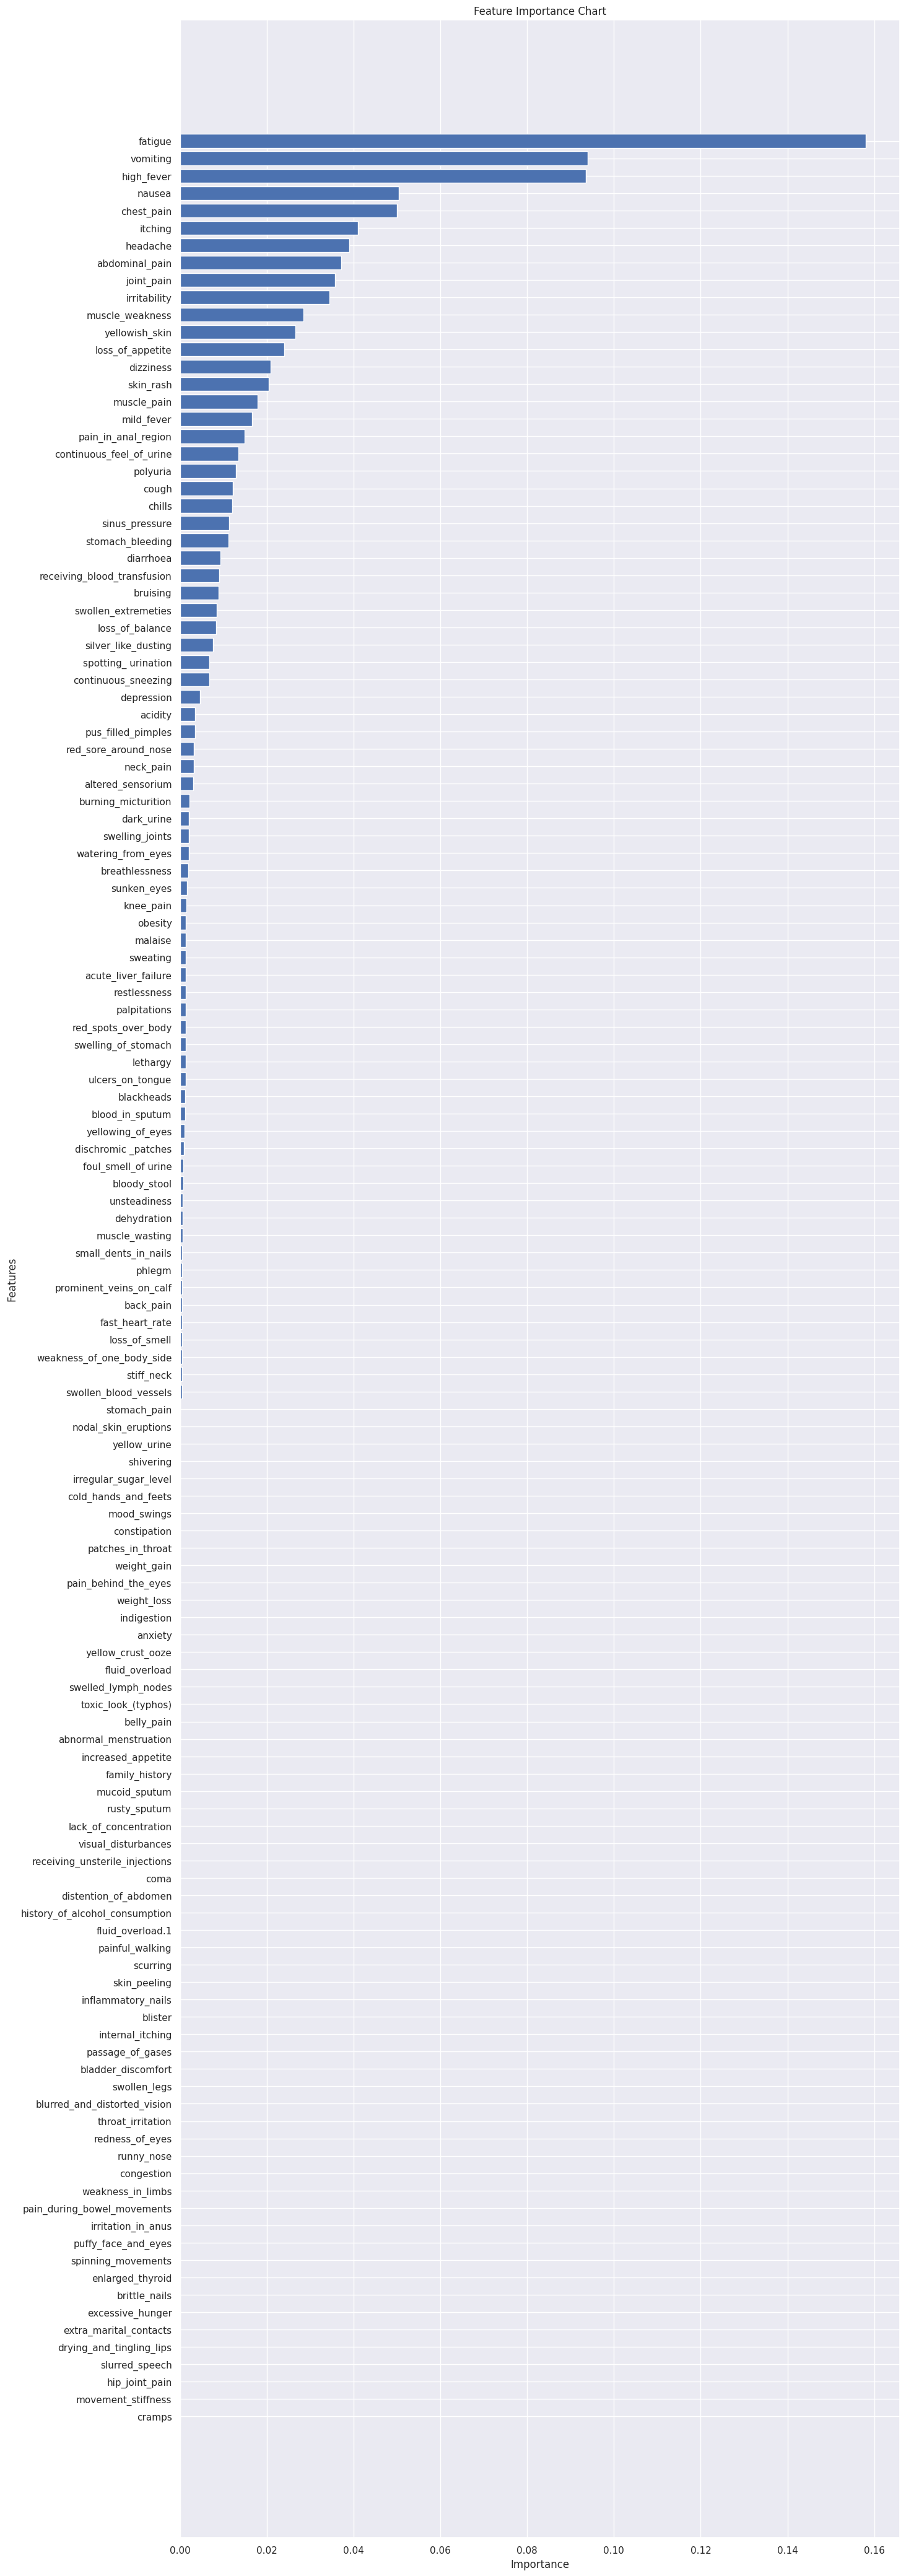

In [25]:
# Get Feature Importance
best_tree = random_search.best_estimator_
feature_importances = best_tree.feature_importances_

# sort feature  importance in descending order
sorted_index = np.argsort(feature_importances)

# create labels
features = np.array(X.columns)

# plot the features
plt.figure(figsize=(15,len(features)*0.4))
plt.title('Feature Importance Chart')
plt.barh(features[sorted_index], feature_importances[sorted_index])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [27]:
# Get features above given threshold importance
importances = random_search.best_estimator_.feature_importances_
threshold = 0.01
important_indices = np.where(importances > threshold)[0]
important_features = features[important_indices ]
print(important_features)
print(len(important_features))

['itching' 'skin_rash' 'chills' 'joint_pain' 'vomiting' 'fatigue' 'cough'
 'high_fever' 'headache' 'yellowish_skin' 'nausea' 'loss_of_appetite'
 'abdominal_pain' 'mild_fever' 'sinus_pressure' 'chest_pain'
 'pain_in_anal_region' 'dizziness' 'muscle_weakness'
 'continuous_feel_of_urine' 'irritability' 'muscle_pain' 'polyuria'
 'stomach_bleeding']
24
